## 2 Edges and nodes

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
g = nx.Graph()
g.add_nodes_from(range(3))
g.add_node('vertex')
print(repr(g.nodes))
print(repr(g.edges))

NodeView((0, 1, 2, 'vertex'))
EdgeView([])


In [3]:
g.add_edge(5,6)
print(repr(g.nodes))
print(repr(g.edges))

NodeView((0, 1, 2, 'vertex', 5, 6))
EdgeView([(5, 6)])


In [4]:
g.add_edge(6,5)
print(repr(g.nodes))
print(repr(g.edges))

NodeView((0, 1, 2, 'vertex', 5, 6))
EdgeView([(5, 6)])


In [5]:
g.remove_node('vertex')
g.nodes

NodeView((0, 1, 2, 5, 6))

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))
EdgeView([(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)])


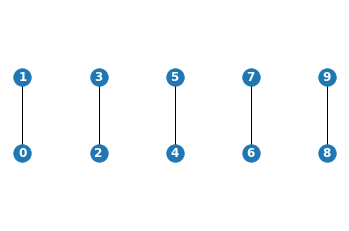

In [6]:
g = nx.Graph()
n = iter(range(10))
g.add_edges_from(zip(n,n))
print(repr(g.nodes))
print(repr(g.edges))
pos = {2 * i: np.array((i, 0)) for i in range(5)}
pos |= {2 * i + 1: pos[2 * i] + (0.0, 1.0) for i in range(5)}
plt.axes().set_aspect('equal', adjustable='datalim')
nx.draw(g, pos=pos, with_labels=True, font_weight='bold', font_color='white')
plt.show()

In [7]:
g.number_of_nodes()

10

In [8]:
g.number_of_edges()

5

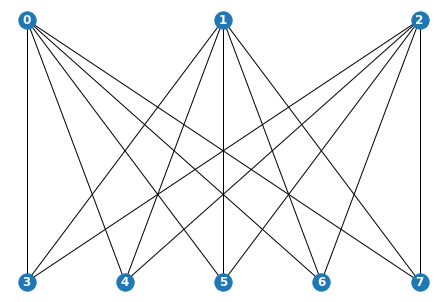

In [9]:
g = nx.complete_bipartite_graph(3,5)
lay = nx.bipartite_layout(g, (v for v, prop in g.nodes('bipartite') if prop == 0),
                              align='horizontal')
nx.draw(g, pos=lay, with_labels=True, font_weight='bold', font_color='white')
plt.show()

### Nodes

In [10]:
g.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7))

In [11]:
g.nodes.data()

NodeDataView({0: {'bipartite': 0}, 1: {'bipartite': 0}, 2: {'bipartite': 0}, 3: {'bipartite': 1}, 4: {'bipartite': 1}, 5: {'bipartite': 1}, 6: {'bipartite': 1}, 7: {'bipartite': 1}})

In [12]:
g.nodes[5]

{'bipartite': 1}

In [13]:
tmp = g.nodes('bipartite')
tmp

NodeDataView({0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}, data='bipartite')

In [14]:
it=(v for v, prop in tmp if prop==0)
for el in it: print(el, end=' ')

0 1 2 

In [15]:
tmp[3]

1

In [16]:
g.nodes[5]['test']=13
g.nodes.data()

NodeDataView({0: {'bipartite': 0}, 1: {'bipartite': 0}, 2: {'bipartite': 0}, 3: {'bipartite': 1}, 4: {'bipartite': 1}, 5: {'bipartite': 1, 'test': 13}, 6: {'bipartite': 1}, 7: {'bipartite': 1}})

### Node degree

In [17]:
g.degree

DegreeView({0: 5, 1: 5, 2: 5, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3})

In [18]:
g.degree[2]

5

In [19]:
g.degree((2,5))

DegreeView({2: 5, 5: 3})

### Edges

In [20]:
g.edges

EdgeView([(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)])

In [21]:
g.edges(4)

EdgeDataView([(4, 0), (4, 1), (4, 2)])

In [22]:
g.edges([3,2])

EdgeDataView([(3, 0), (3, 1), (3, 2), (2, 4), (2, 5), (2, 6), (2, 7)])

In [23]:
g.edges.data()

EdgeDataView([(0, 3, {}), (0, 4, {}), (0, 5, {}), (0, 6, {}), (0, 7, {}), (1, 3, {}), (1, 4, {}), (1, 5, {}), (1, 6, {}), (1, 7, {}), (2, 3, {}), (2, 4, {}), (2, 5, {}), (2, 6, {}), (2, 7, {})])

In [24]:
g[1][3]['test']=13
g.edges.data()

EdgeDataView([(0, 3, {}), (0, 4, {}), (0, 5, {}), (0, 6, {}), (0, 7, {}), (1, 3, {'test': 13}), (1, 4, {}), (1, 5, {}), (1, 6, {}), (1, 7, {}), (2, 3, {}), (2, 4, {}), (2, 5, {}), (2, 6, {}), (2, 7, {})])

In [25]:
g.edges[2,6]['test']=14
g.edges.data()

EdgeDataView([(0, 3, {}), (0, 4, {}), (0, 5, {}), (0, 6, {}), (0, 7, {}), (1, 3, {'test': 13}), (1, 4, {}), (1, 5, {}), (1, 6, {}), (1, 7, {}), (2, 3, {}), (2, 4, {}), (2, 5, {}), (2, 6, {'test': 14}), (2, 7, {})])

In [26]:
g.edges(data='test')

EdgeDataView([(0, 3, None), (0, 4, None), (0, 5, None), (0, 6, None), (0, 7, None), (1, 3, 13), (1, 4, None), (1, 5, None), (1, 6, None), (1, 7, None), (2, 3, None), (2, 4, None), (2, 5, None), (2, 6, 14), (2, 7, None)])

### Adjacency

In [27]:
g.adj

AdjacencyView({0: {3: {}, 4: {}, 5: {}, 6: {}, 7: {}}, 1: {3: {'test': 13}, 4: {}, 5: {}, 6: {}, 7: {}}, 2: {3: {}, 4: {}, 5: {}, 6: {'test': 14}, 7: {}}, 3: {0: {}, 1: {'test': 13}, 2: {}}, 4: {0: {}, 1: {}, 2: {}}, 5: {0: {}, 1: {}, 2: {}}, 6: {0: {}, 1: {}, 2: {'test': 14}}, 7: {0: {}, 1: {}, 2: {}}})

In [28]:
g.adj[4]

AtlasView({0: {}, 1: {}, 2: {}})

In [29]:
g[4]

AtlasView({0: {}, 1: {}, 2: {}})

In [30]:
g.has_edge(2,4)

True

In [31]:
2 in g[4]

True

In [32]:
20 in g[4]

False

In [33]:
for el in g.adjacency(): print(el)

(0, {3: {}, 4: {}, 5: {}, 6: {}, 7: {}})
(1, {3: {'test': 13}, 4: {}, 5: {}, 6: {}, 7: {}})
(2, {3: {}, 4: {}, 5: {}, 6: {'test': 14}, 7: {}})
(3, {0: {}, 1: {'test': 13}, 2: {}})
(4, {0: {}, 1: {}, 2: {}})
(5, {0: {}, 1: {}, 2: {}})
(6, {0: {}, 1: {}, 2: {'test': 14}})
(7, {0: {}, 1: {}, 2: {}})


In [34]:
for el in g.adj.items(): print(el)

(0, AtlasView({3: {}, 4: {}, 5: {}, 6: {}, 7: {}}))
(1, AtlasView({3: {'test': 13}, 4: {}, 5: {}, 6: {}, 7: {}}))
(2, AtlasView({3: {}, 4: {}, 5: {}, 6: {'test': 14}, 7: {}}))
(3, AtlasView({0: {}, 1: {'test': 13}, 2: {}}))
(4, AtlasView({0: {}, 1: {}, 2: {}}))
(5, AtlasView({0: {}, 1: {}, 2: {}}))
(6, AtlasView({0: {}, 1: {}, 2: {'test': 14}}))
(7, AtlasView({0: {}, 1: {}, 2: {}}))


In [35]:
for el in g.neighbors(3): print(el)

0
1
2
